<h1>Zadanie4</h1>

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy import signal

In [2]:
def readFile(filename):
    global ekg
    try:
        with open(filename, 'r') as file:
            ekg = file.read()

    except FileNotFoundError:
        print(f"Plik {filename} nie został znaleziony.")
    except Exception as e:
        print(f"Wystąpił błąd podczas wczytywania pliku {filename}: {e}")

Wczytywanie danych z pliku

In [3]:
readFile("ekg_noise.txt")

signals = np.array([list(map(float, line.split())) for line in ekg.split("\n")])

x = signals.T[0]
y = signals.T[1]


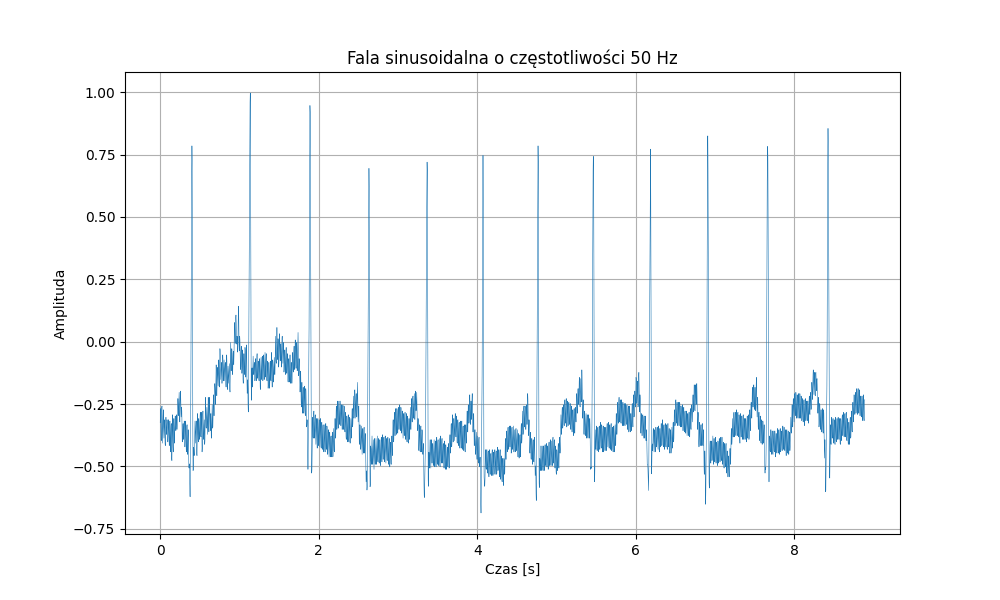

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, lw=0.4)
plt.title('Fala sinusoidalna o częstotliwości 50 Hz')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

<h1>1</h1>
Charakterystyka amplitudowa sygnału.

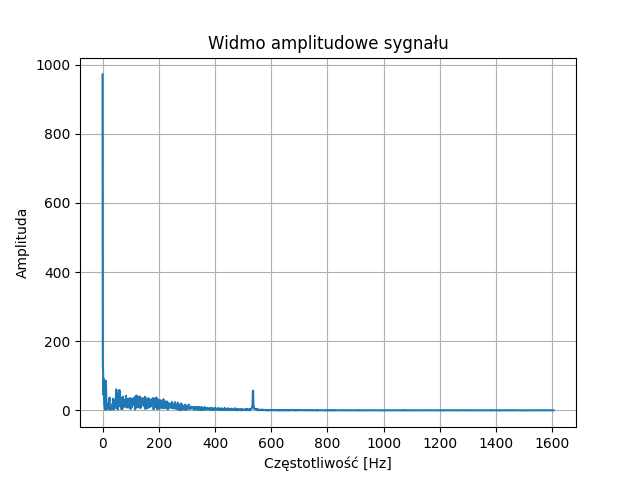

In [5]:
fs = len(y)/max(y) #częstotliwość próbkowania

dft = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), 1/fs)


# Wykres widma amplitudowego
plt.figure()
plt.plot(freq[:len(freq)//2], abs(dft[:len(freq)//2]))
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.title('Widmo amplitudowe sygnału')
plt.grid(True)
plt.show()